# Closed Deals Analysis

The aim of this project is to analyse a sample of deals closed by the Olist sales team over the period between July 2017 and May 2018, across the following dimensions:


1.	**Where are conversions coming from?** Proportion of conversions by:
    - Channel 
    - Business type
    - Lead type
    - Business segment
 
 
2.	**What do the customer do?** Break down of channels by:
    - Business type
    - Lead type
    - Business segment


3.	**How long does it take to close a deal?** Deal length Analysis:
    - Deal length distribution
    - Deal length over time
    - Deal length distribution by lead type
    - Deal length distribution by business type


In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
plt.style.use('seaborn')

## Data Gathering

In [5]:
mql=pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
closed_deals=pd.read_csv('olist_closed_deals_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')

In [6]:
#merge closed_deals with seller
closed_deals=closed_deals.merge(sellers, on='seller_id').merge(mql, on='mql_id')
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
2,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search
4,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown


In [7]:
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 20 columns):
mql_id                           380 non-null object
seller_id                        380 non-null object
sdr_id                           380 non-null object
sr_id                            380 non-null object
won_date                         380 non-null object
business_segment                 380 non-null object
lead_type                        377 non-null object
lead_behaviour_profile           289 non-null object
has_company                      5 non-null object
has_gtin                         5 non-null object
average_stock                    5 non-null object
business_type                    377 non-null object
declared_product_catalog_size    0 non-null float64
declared_monthly_revenue         380 non-null float64
seller_zip_code_prefix           380 non-null int64
seller_city                      380 non-null object
seller_state                     380 non-null object
f

### Cleaning Issues:

 - lead_type: replace with 'unknown'
 
 - lead_behaviour_profile: replace with 'unknown'
 
 - has_company: drop
 
 - has_gtin: drop
 
 - average_stock: drop
 
 - business_type: replace with 'unknown'
 
 - declare_product_size: drop
 
 - origin: replace with 'unknown'

In [9]:
#drop columns
closed_deals.drop(['declared_product_catalog_size','average_stock','has_gtin','has_company'],axis=1,inplace=True)
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,30421,belo horizonte,MG,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,93542,novo hamburgo,RS,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
2,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,11015,santos,SP,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,manufacturer,0.0,30668,belo horizonte,MG,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search
4,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,manufacturer,0.0,92010,canoas,RS,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown


In [10]:
#replace values
closed_deals.fillna('unknown',inplace=True)
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 16 columns):
mql_id                      380 non-null object
seller_id                   380 non-null object
sdr_id                      380 non-null object
sr_id                       380 non-null object
won_date                    380 non-null object
business_segment            380 non-null object
lead_type                   380 non-null object
lead_behaviour_profile      380 non-null object
business_type               380 non-null object
declared_monthly_revenue    380 non-null float64
seller_zip_code_prefix      380 non-null int64
seller_city                 380 non-null object
seller_state                380 non-null object
first_contact_date          380 non-null object
landing_page_id             380 non-null object
origin                      380 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 50.5+ KB


### 1.	Analysis of conversions - Where are conversions coming from?

#### Conversions across channels

(<matplotlib.axes._subplots.AxesSubplot at 0x16fb4e9c400>,
 organic_search    29.736842
 paid_search       26.578947
 unknown           22.368421
 social             8.157895
 direct_traffic     8.157895
 referral           2.368421
 email              1.578947
 display            0.526316
 other              0.526316
 Name: origin, dtype: float64)

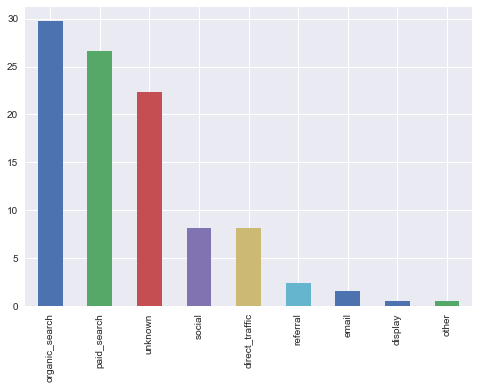

In [16]:
(closed_deals['origin'].value_counts(normalize=True)*100).plot(kind='bar'), closed_deals['origin'].value_counts(normalize=True)*100

#### Conversions across business type

(<matplotlib.axes._subplots.AxesSubplot at 0x16fb4f14278>,
 reseller        75.526316
 manufacturer    23.684211
 unknown          0.789474
 Name: business_type, dtype: float64)

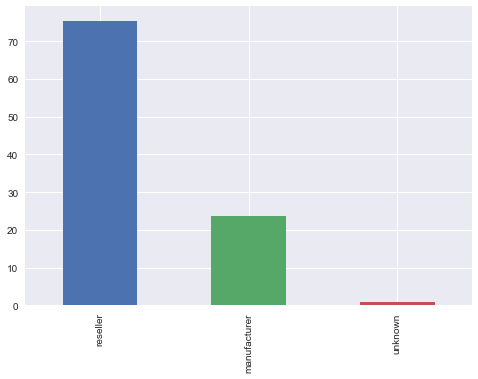

In [17]:
(closed_deals['business_type'].value_counts(normalize=True)*100).plot(kind='bar'), closed_deals['business_type'].value_counts(normalize=True)*100

#### Conversions across lead type

(<matplotlib.axes._subplots.AxesSubplot at 0x16fb4f6c630>,
 online_medium      45.263158
 online_big         20.789474
 industry           10.789474
 offline             7.894737
 online_small        7.368421
 online_beginner     5.526316
 online_top          1.578947
 unknown             0.789474
 Name: lead_type, dtype: float64)

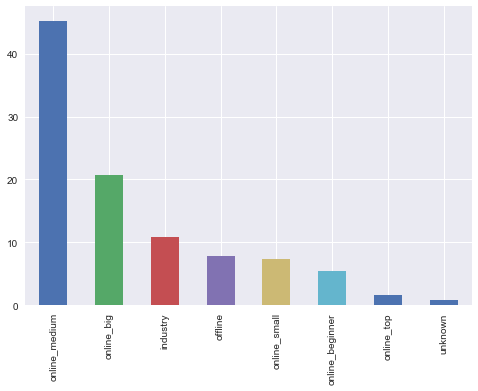

In [18]:
(closed_deals['lead_type'].value_counts(normalize=True)*100).plot(kind='bar'), closed_deals['lead_type'].value_counts(normalize=True)*100

#### Conversions across business segments

(<matplotlib.axes._subplots.AxesSubplot at 0x16fb4fda748>,
 health_beauty                      11.842105
 home_decor                         11.578947
 household_utilities                11.578947
 construction_tools_house_garden     8.421053
 audio_video_electronics             8.157895
 car_accessories                     7.894737
 pet                                 4.473684
 bags_backpacks                      3.684211
 sports_leisure                      3.684211
 computers                           3.157895
 bed_bath_table                      2.631579
 toys                                2.631579
 food_drink                          2.368421
 food_supplement                     2.105263
 small_appliances                    1.842105
 stationery                          1.842105
 fashion_accessories                 1.578947
 baby                                1.578947
 phone_mobile                        1.315789
 home_appliances                     1.315789
 music_instruments   

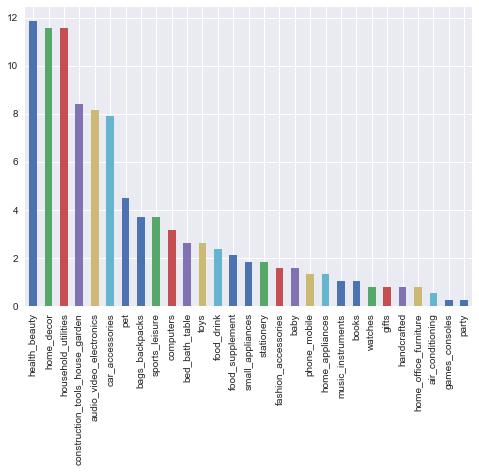

In [19]:
(closed_deals['business_segment'].value_counts(normalize=True)*100).plot(kind='bar'), closed_deals['business_segment'].value_counts(normalize=True)*100

#### Summary plot

Text(0.5, 0.98, 'Where are conversions coming from?')

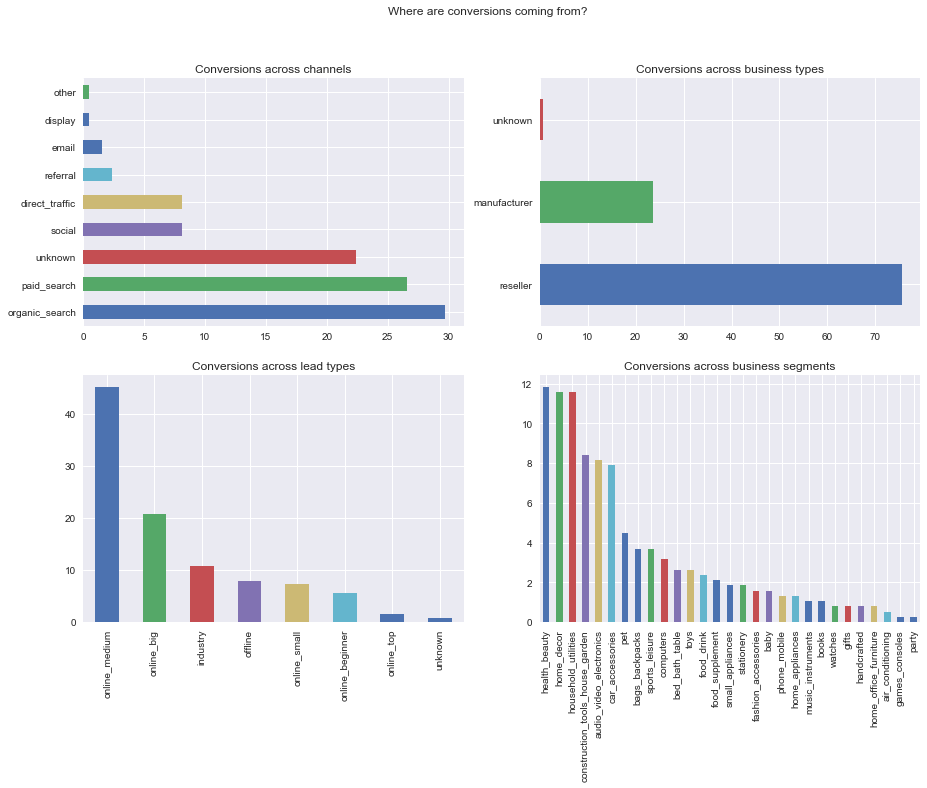

In [40]:
fig = plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

(closed_deals['origin'].value_counts(normalize=True)*100).plot(kind='barh', title='Conversions across channels', ax=ax1)
(closed_deals['business_type'].value_counts(normalize=True)*100).plot(kind='barh', title='Conversions across business types', ax=ax2)
(closed_deals['lead_type'].value_counts(normalize=True)*100).plot(kind='bar', title='Conversions across lead types', ax=ax3)
(closed_deals['business_segment'].value_counts(normalize=True)*100).plot(kind='bar', title='Conversions across business segments', ax=ax4)

plt.suptitle('Where are conversions coming from?')

### Analysis of channels - Where are our customers from and what they do? Who are they?

#### Breakdown of channel by business type

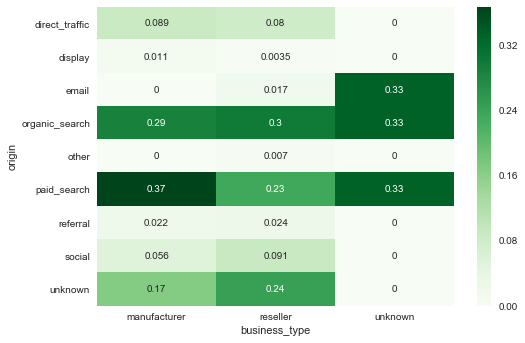

In [42]:
sns.heatmap(pd.crosstab(closed_deals.origin,closed_deals.business_type, normalize='columns'), annot=True, cmap='Greens')

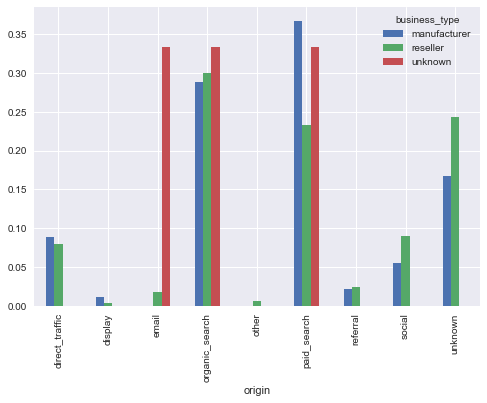

In [54]:
pd.crosstab(closed_deals.origin,closed_deals.business_type, normalize='columns').plot(kind='bar')

#### Breakdown of channel by lead type

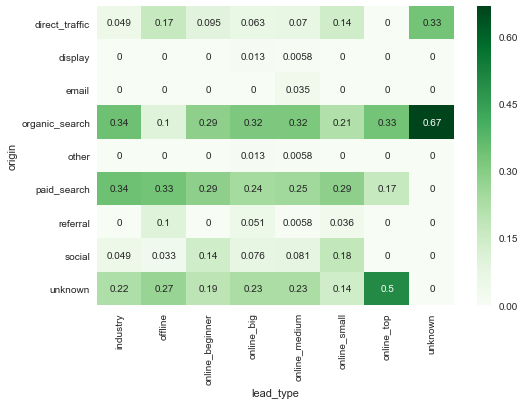

In [44]:
sns.heatmap(pd.crosstab(closed_deals.origin,closed_deals.lead_type, normalize='columns'), annot=True, cmap='Greens')

More mature online users tend to come fro organi search while less online savvy users tend to come from paid search and direct traffic and if business is ran online but not mature online business social is a preminent.

Breakdown:

business:
 - on line VS offline
online maturity:
 - mature VS not mature

#### Breakdown of channel by lead behaviour profile

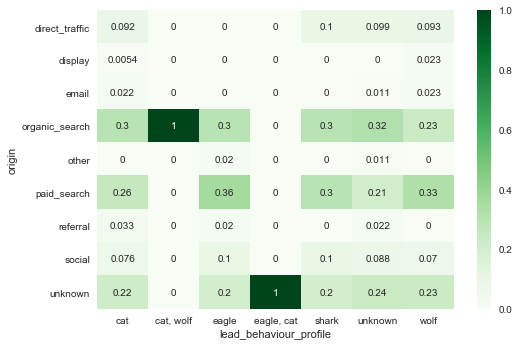

In [52]:
sns.heatmap(pd.crosstab(closed_deals.origin,closed_deals.lead_behaviour_profile, normalize='columns'), annot=True, cmap='Greens')

### Deal length Analysis:

- Deal length distribution
- Evolution of deal lenght
- Deal length distribution by channel
- Deal length distribution by lead type
- Deal length distribution by business type
- Deal length distribution by lead behaviour profile

In [55]:
# convert to datetime
closed_deals['won_date']=pd.to_datetime(closed_deals['won_date'])
closed_deals['first_contact_date']=pd.to_datetime(closed_deals['first_contact_date'])

In [57]:
# create variable deal_lenght
closed_deals['deal_lenght']=(closed_deals.won_date-closed_deals.first_contact_date)/np.timedelta64(1,'D')
closed_deals['deal_lenght']=closed_deals['deal_lenght'].astype(int)

In [93]:
def plot_distribution(data, title, axlabel): #df.col_name, title=string, xlabel=string
                      plt.figure(figsize=(12,6))
                      sns.distplot(data, axlabel=axlabel)

                      plt.axvline(data.mean(), c='green', ymax=0.95)
                      plt.axvline(data.median(), c='orange', ymax=0.95)
                      plt.axvline(data.describe()[4], c='yellow', ymax=0.95)
                      plt.axvline(data.describe()[6], c='red', ymax=0.95)

                      plt.title(title)
                      plt.legend(labels=['mean', 'median', '1st quartile', '3rd quartile'])

#### Deal length distribution

In [58]:
closed_deals['deal_lenght'].describe()

count    380.000000
mean      28.057895
std       50.805406
min       -1.000000
25%        4.000000
50%       10.000000
75%       25.250000
max      369.000000
Name: deal_lenght, dtype: float64

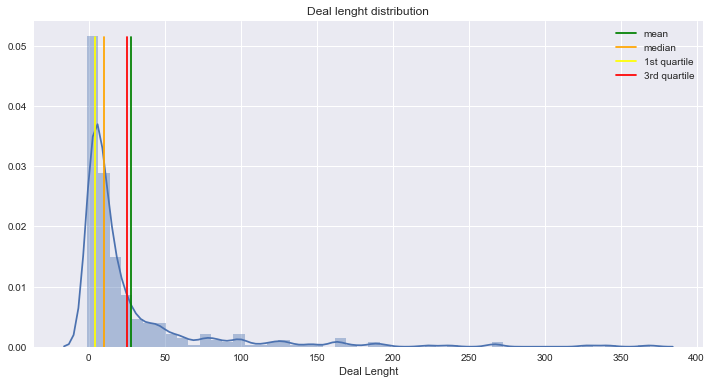

In [95]:
plot_distribution(closed_deals.deal_lenght, 'Deal lenght distribution', 'Deal Lenght')

#### Evolution of deal lenght

In [70]:
ts=closed_deals.set_index('first_contact_date')

Text(0, 0.5, 'Deal Lenght (days)')

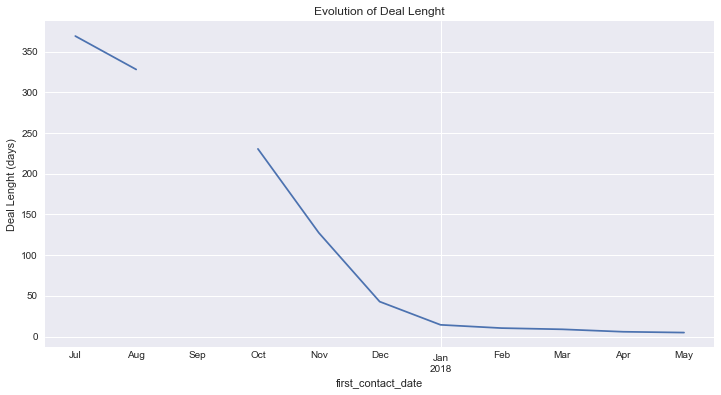

In [71]:
ts.resample('M')['deal_lenght'].median().plot(figsize=(12,6),title='Evolution of Deal Lenght').set_ylabel('Deal Lenght (days)')

In [77]:
((ts.resample('M')['deal_lenght'].median()[-1]-ts.resample('M')['deal_lenght'].median()[0])/ts.resample('M')['deal_lenght'].median()[-1])*100

-7280.0

The deal lenght dropped by the 7280% from July 2017.

#### Deal lenght distribution by channel

Text(0.5, 0, 'Channel')

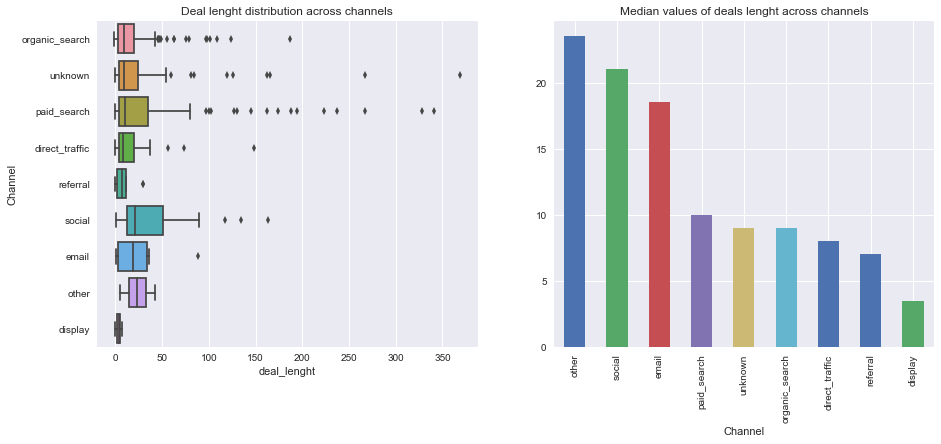

In [99]:
fig=plt.figure(figsize=(15,6))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.set_title('Deal lenght distribution across channels')
sns.boxplot(x='deal_lenght', y='origin', data=closed_deals, ax=ax1).set_ylabel('Channel')
closed_deals.groupby('origin')['deal_lenght'].median().sort_values(ascending=False).plot(kind='bar', ax=ax2, title='Median values of deals lenght across channels').set_xlabel('Channel')

#### Deal lenght distribution by lead type

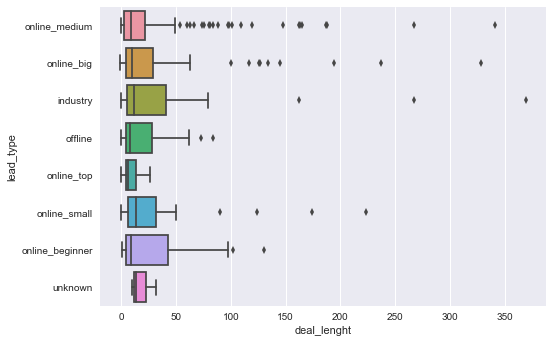

In [80]:
sns.boxplot(x='deal_lenght', y='lead_type', data=closed_deals)

#### Deal lenght distribution by business type

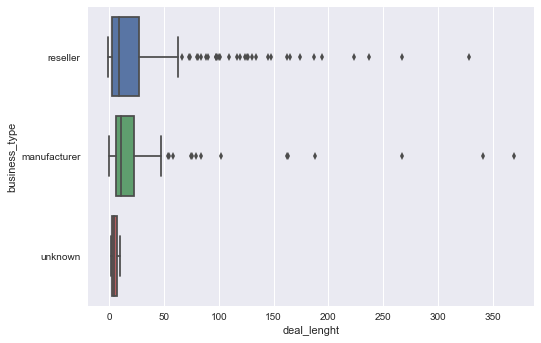

In [81]:
sns.boxplot(x='deal_lenght', y='business_type', data=closed_deals)

#### Deal lenght distribution by lead behaviour profile

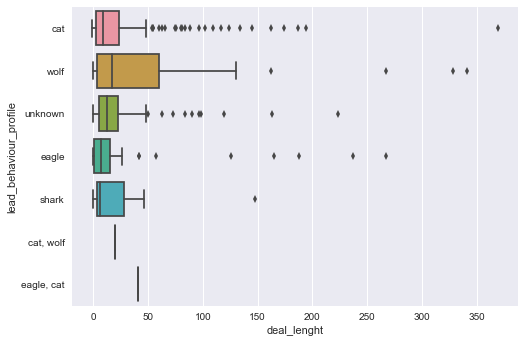

In [82]:
sns.boxplot(x='deal_lenght', y='lead_behaviour_profile', data=closed_deals)